In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer, load_digits
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

# Breast Cancer

In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST

In [3]:
df=load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digit=pd.DataFrame(df.data)
digit.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
x=digit.astype(float)
y_obj=df.target.astype(float)

In [6]:
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [7]:
y.shape

(1797,)

In [8]:
y_encoded = tf.keras.utils.to_categorical(y)
y_encoded.shape

(1797, 10)

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x, y_encoded, test_size=0.2, random_state=seed)

In [10]:
y_train.shape

(1437, 10)

In [11]:
model=Sequential([
    Dense(500, input_shape=(64,), activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               32500     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 213,910
Trainable params: 213,910
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [15]:
modelpath = MODEL_DIR + "MNIST.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [16]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=5000, batch_size=1000,
                    verbose=2, callbacks=[early_stopping_callback, checkpointer_callback])

Train on 1149 samples, validate on 288 samples
Epoch 1/5000

Epoch 00001: val_loss improved from inf to 2.53110, saving model to ./model/MNIST.hdf5
1149/1149 - 1s - loss: 4.5262 - accuracy: 0.1123 - val_loss: 2.5311 - val_accuracy: 0.3194
Epoch 2/5000

Epoch 00002: val_loss improved from 2.53110 to 1.38112, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 2.3882 - accuracy: 0.3290 - val_loss: 1.3811 - val_accuracy: 0.6389
Epoch 3/5000

Epoch 00003: val_loss improved from 1.38112 to 0.93777, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 1.2452 - accuracy: 0.6710 - val_loss: 0.9378 - val_accuracy: 0.7153
Epoch 4/5000

Epoch 00004: val_loss improved from 0.93777 to 0.61847, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 0.8202 - accuracy: 0.7380 - val_loss: 0.6185 - val_accuracy: 0.7812
Epoch 5/5000

Epoch 00005: val_loss improved from 0.61847 to 0.49398, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 0.5489 - accuracy: 0.8346 - val_loss: 0.4940 

Epoch 47/5000

Epoch 00047: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9757
Epoch 48/5000

Epoch 00048: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9722
Epoch 49/5000

Epoch 00049: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9722
Epoch 50/5000

Epoch 00050: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9757
Epoch 51/5000

Epoch 00051: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9757
Epoch 52/5000

Epoch 00052: val_loss did not improve from 0.07617
1149/1149 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9757
Epoch 53/5000

Epoch 00053: val_loss did not improve from 

Epoch 98/5000

Epoch 00098: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 7.0271e-04 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9792
Epoch 99/5000

Epoch 00099: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 6.8994e-04 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 100/5000

Epoch 00100: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 6.7720e-04 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9792
Epoch 101/5000

Epoch 00101: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 6.6444e-04 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 102/5000

Epoch 00102: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 6.5412e-04 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9792
Epoch 103/5000

Epoch 00103: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 6.4131e-04 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9792
Epoch 104/5000

Epoch 00104: v

Epoch 149/5000

Epoch 00149: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.5753e-04 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9792
Epoch 150/5000

Epoch 00150: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.5263e-04 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 151/5000

Epoch 00151: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.4858e-04 - accuracy: 1.0000 - val_loss: 0.0721 - val_accuracy: 0.9792
Epoch 152/5000

Epoch 00152: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.4451e-04 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 153/5000

Epoch 00153: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.3942e-04 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9792
Epoch 154/5000

Epoch 00154: val_loss did not improve from 0.07144
1149/1149 - 0s - loss: 2.3525e-04 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 155/5000

Epoch 00155:

Epoch 199/5000

Epoch 00199: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.1208e-04 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 200/5000

Epoch 00200: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.0943e-04 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 201/5000

Epoch 00201: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.0769e-04 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 202/5000

Epoch 00202: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.0632e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9792
Epoch 203/5000

Epoch 00203: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.0498e-04 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9792
Epoch 204/5000

Epoch 00204: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 1.0373e-04 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 205/5000

Epoch 00205:

Epoch 250/5000

Epoch 00250: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 6.2140e-05 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 251/5000

Epoch 00251: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 6.1064e-05 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9792
Epoch 252/5000

Epoch 00252: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 6.0244e-05 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9826
Epoch 253/5000

Epoch 00253: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 5.9837e-05 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9826
Epoch 254/5000

Epoch 00254: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 5.9636e-05 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9826
Epoch 255/5000

Epoch 00255: val_loss did not improve from 0.06824
1149/1149 - 0s - loss: 5.8741e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9792
Epoch 256/5000

Epoch 00256:

In [17]:
del model

In [18]:
model = load_model('model/MNIST.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.0658 - accuracy: 0.9917

 Accuracy: 0.9917


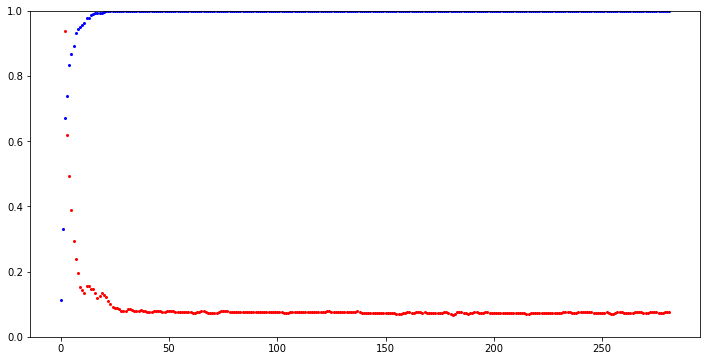

In [19]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)
plt.show()

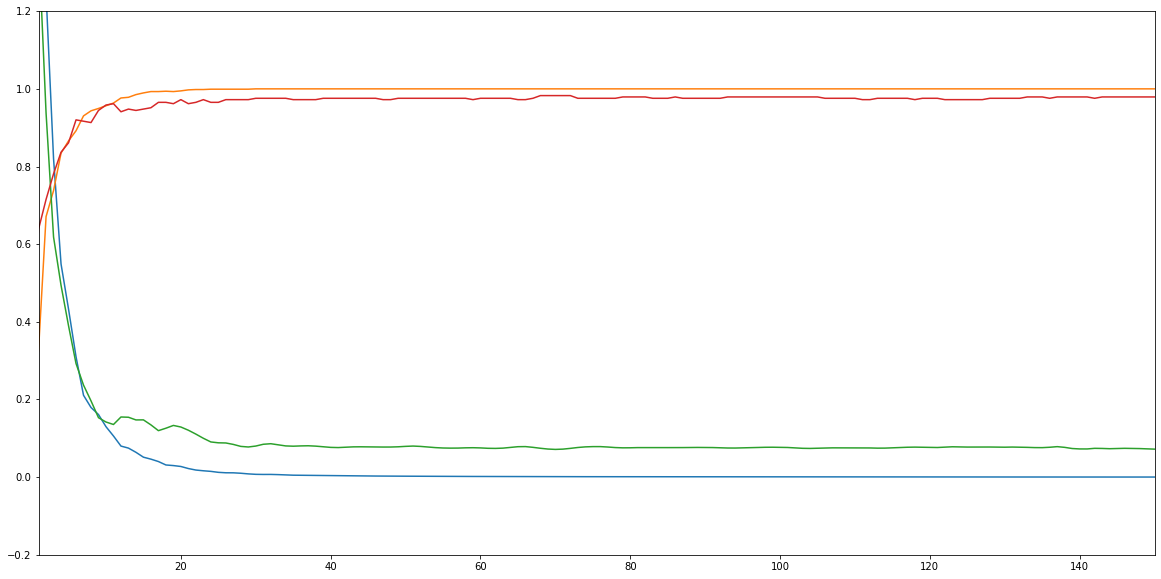

In [20]:
a=pd.DataFrame(history.history)
plt.figure(figsize=(20,10))
plt.xlim(1,150)
plt.ylim(-0.2,1.2)
plt.plot(a,"-",markersize=5)
plt.show()